<div style="width: 100%; margin: 0 auto;">
    <a href="https://github.com/e10101/learning-operations-research">
        <img src="../assets/banner.svg" alt="Learning Operations Research" style="width: 100%; height: auto; display: block;">
    </a>
</div>

# Traveling Salesman Problem (TSP) - 2-Opt
---

[![Github](../assets/badges/github.svg)](https://github.com/e10101/learning-operations-research)
[![Bilibili](../assets/badges/bilibili.svg)](https://www.bilibili.com/video/BV15KdVYkEec/) 


Ref: https://www.youtube.com/watch?v=UAEjUk0Zf90&list=PLKQ1MjSFuxKced-SxpwUSOCrXadMD-7yw&index=2

In [1]:
import networkx as nx

In [2]:
n = 20
G = nx.complete_graph(n)

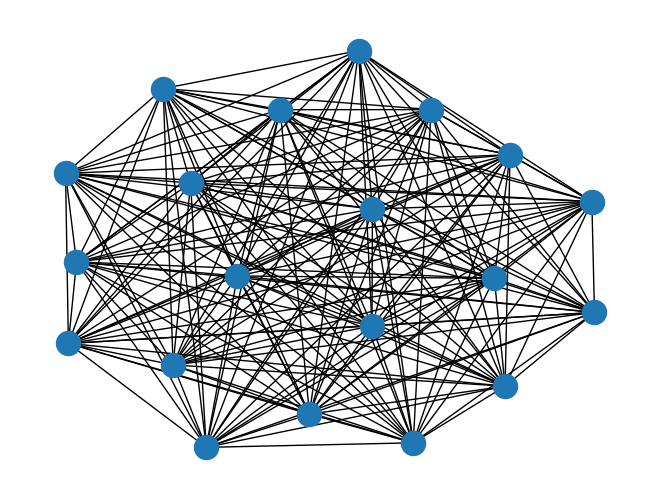

In [3]:
nx.draw(G)

## Define Random Postions

In [4]:
import random

node_pos = {i: (random.random(), random.random()) for i in range(n)}

In [5]:
[{key: node_pos[key]} for key in list(node_pos)[:5]]

[{0: (0.0784703069722189, 0.6602451689174145)},
 {1: (0.4079698112417519, 0.042080571581560755)},
 {2: (0.3788144376024968, 0.9374244350374414)},
 {3: (0.24735446033551944, 0.5899837056665133)},
 {4: (0.48362394922445195, 0.06303599513785452)}]

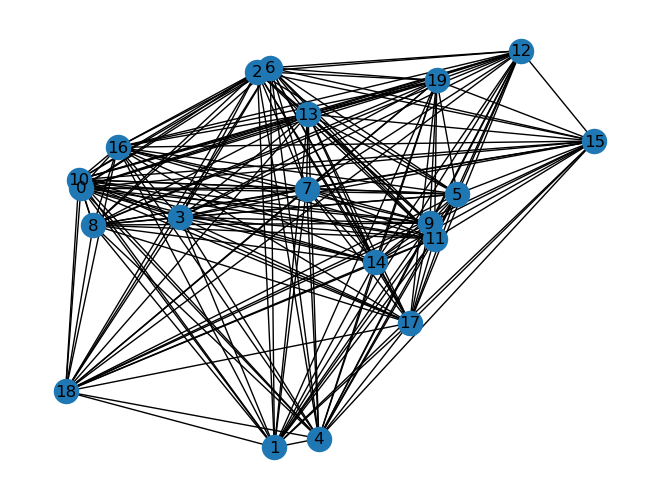

In [6]:
nx.draw(G, pos=node_pos, labels={i: i for i in range(n)})

## 2-Opt Algorithm

In [8]:
import math

def dist_of_positions(pos1, pos2):
    return math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)

def length_of_path(path, node_pos=node_pos):
    length = 0
    for i in range(len(path)-1):
        node1 = node_pos[path[i]]
        node2 = node_pos[path[i+1]]
        dist = dist_of_positions(node1, node2)
        # print(f'distance between {path[i]}{node1} and {path[i+1]}{node2} is {dist}')
        length += dist

    return length

def convert_nodes_to_connected_edges(nodes):
    edges = []
    for i in range(-1, len(nodes) - 1):
        edges.append((nodes[i], nodes[i+1]))

    return edges

def get_pos_with_tour(index, tour, node_pos=node_pos):
    return node_pos[tour[index]]

In [22]:
tour = list(range(n))
tour

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [23]:
length_of_path(tour)

10.832164668458757

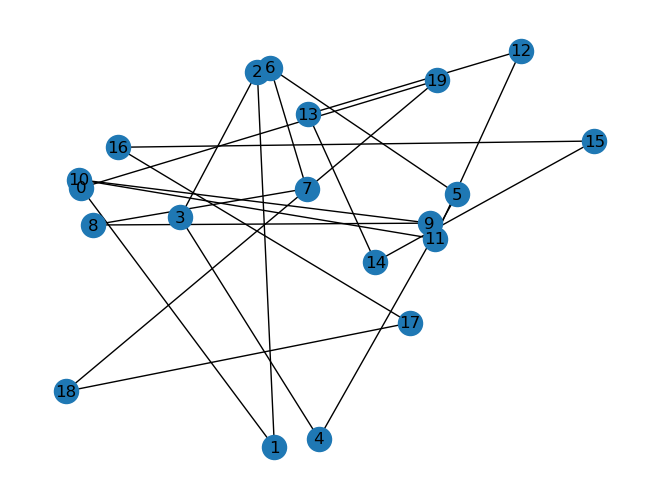

In [24]:
nx.draw(G, pos=node_pos, edgelist=convert_nodes_to_connected_edges(tour), labels={tour[i]: i for i in range(len(tour))})

In [ ]:
improved = True

min_length = -1
times = 0

while improved and times < 1000:
    times += 1
    improved = False
    print('-' * 32)
    print(f'times: {times}')
    print(f'min_length: {length_of_path(tour)}')
    print(f'tour: {tour}')

    for i in range(n):
        for j in range(i+1, n):
            print()
            print(i, j)

            pos_i = get_pos_with_tour(i, tour=tour)
            pos_j = get_pos_with_tour(j, tour=tour)
            pos_i_1 = get_pos_with_tour((i+1) % n, tour=tour)
            pos_j_1 = get_pos_with_tour((j+1) % n, tour=tour)

            print(f'pos_i: {pos_i}')
            print(f'pos_i_1: {pos_i_1}')
            print(f'pos_j: {pos_j}')
            print(f'pos_j_1: {pos_j_1}')
            print()

            old_length = dist_of_positions(pos_i, pos_i_1) \
                + dist_of_positions(pos_j, pos_j_1)
            new_length = dist_of_positions(pos_i, pos_j) \
                + dist_of_positions(pos_i_1, pos_j_1)

            if new_length < old_length:
                print(f'old_length: ({i},{i+1} = {j},{j+1}) {old_length}\nnew_length: ({i},{j} = {i+1},{j+1}) {new_length}')
                tour[i+1:j+1] = tour[i+1:j+1][::-1]
                improved = True
                min_length = new_length
                print(f'  new_path: {len(tour)} - {tour}')
                print(f'  length: {length_of_path(tour)}')
                # break

print('*' * 32)
print(f'Final tour: {tour}')
print(f'Final length: {length_of_path(tour)}')

In [26]:
print('*' * 32)
print(f'times: {times}')
print(f'Final tour: ({len(tour)}) {tour}')
print(f'Final length: {length_of_path(tour)}')

********************************
times: 3
Final tour: (20) [0, 10, 16, 2, 6, 13, 7, 19, 12, 15, 5, 9, 11, 14, 17, 4, 1, 18, 3, 8]
Final length: 3.538572587276634


In [27]:
print(convert_nodes_to_connected_edges(tour))

[(8, 0), (0, 10), (10, 16), (16, 2), (2, 6), (6, 13), (13, 7), (7, 19), (19, 12), (12, 15), (15, 5), (5, 9), (9, 11), (11, 14), (14, 17), (17, 4), (4, 1), (1, 18), (18, 3), (3, 8)]


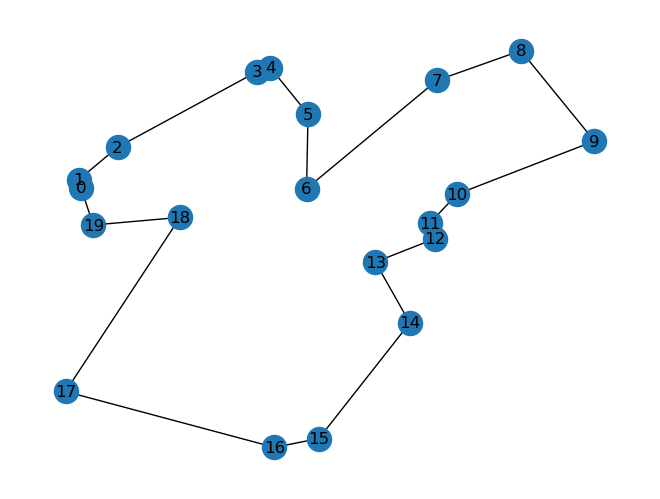

In [28]:
nx.draw(G, pos=node_pos, edgelist=convert_nodes_to_connected_edges(tour), labels={tour[i]: i for i in range(len(tour))})